In [18]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

from blume.process import read, compute
from blume.run import new_folder, save, sweep_T
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [20]:
chi_range = range(1, 15)
dir = new_folder()

T_c = 2 / np.log(1 + np.sqrt(2))
T_range = [T_c for _ in range(10)]
for chi in chi_range:
    data = sweep_T(
        chi=chi,
        T_range=T_range,
        tol=1e-9,
        max_steps=int(10e8),
        use_prev=False,
    )
    save(data, dir)

chi = 1: 100%|██████████| 10/10 [00:00<00:00, 574.32it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 2: 100%|██████████| 10/10 [00:01<00:00,  7.77it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 3: 100%|██████████| 10/10 [00:01<00:00,  5.11it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 4: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 5: 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 6: 100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 7: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 8: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 9: 100%|██████████| 10/10 [00:29<00:00,  2.94s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 10: 100%|██████████| 10/10 [00:51<00:00,  5.12s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 11: 100%|██████████| 10/10 [01:04<00:00,  6.43s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 12: 100%|██████████| 10/10 [01:06<00:00,  6.68s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 13: 100%|██████████| 10/10 [01:21<00:00,  8.19s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 14: 100%|██████████| 10/10 [01:31<00:00,  9.14s/it]

Saving data in folder: '24-04 16:18'
Done 



In [21]:
mean_mags, mean_xis, errors = [], [], []
for chi in chi_range[1:]:
    data = read(folder=dir, val=chi)
    mags = compute(Prop.m, data)
    corrs = compute(Prop.xi, data)

    mean_xis.append(np.mean(corrs))
    mean_mags.append(np.mean(mags))
    errors.append(np.std(mags))

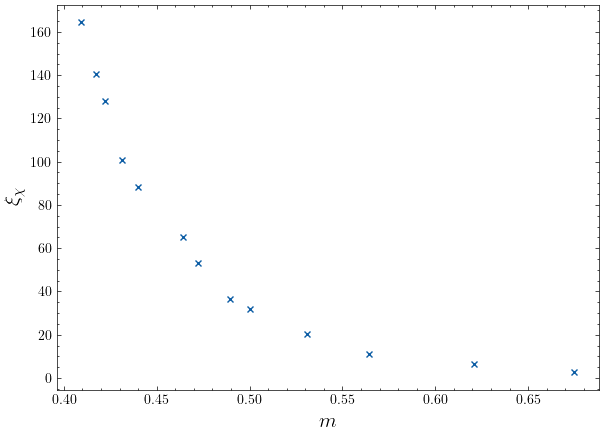

In [23]:
plt.figure(figsize=(7, 5))
plt.errorbar(mean_xis, mean_mags, yerr = errors, fmt = "x", markersize=5)
plt.xlabel(r"$\xi_{\chi}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.savefig(f"data/{dir}/critical")